In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Medical%20Insurance%20Premium%20Prediction/Medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [4]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

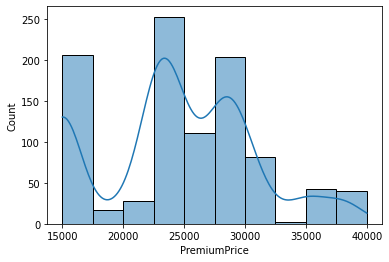

In [5]:
sns.histplot(data=df, x='PremiumPrice',bins=10, kde=True )

<AxesSubplot:>

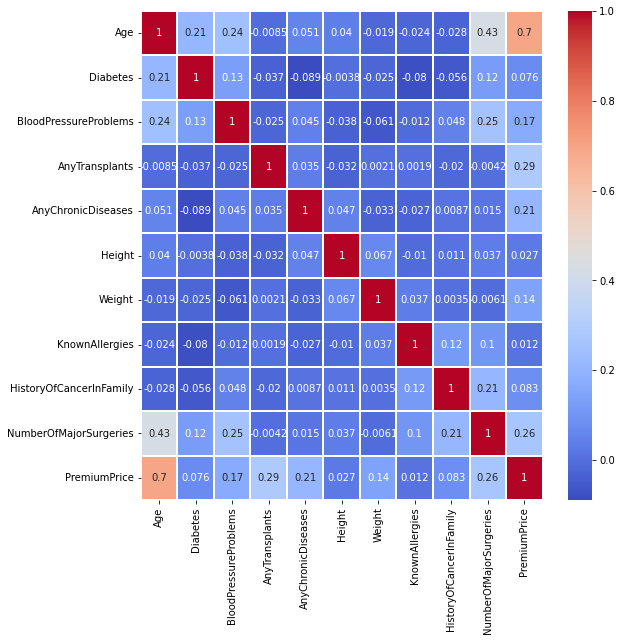

In [6]:
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True,linewidths=0.1)

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

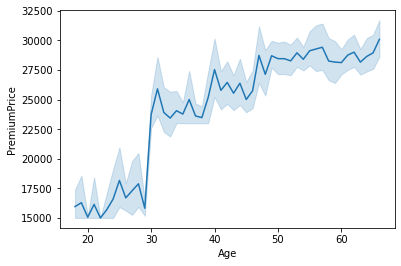

In [7]:
sns.lineplot(x=df.Age,y=df.PremiumPrice)

<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

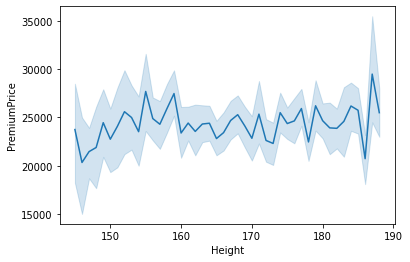

In [8]:
sns.lineplot(x=df.Height,y=df.PremiumPrice)

<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

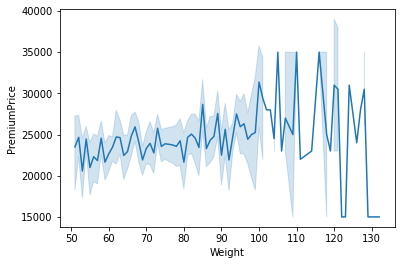

In [9]:
sns.lineplot(x=df.Weight,y=df.PremiumPrice)

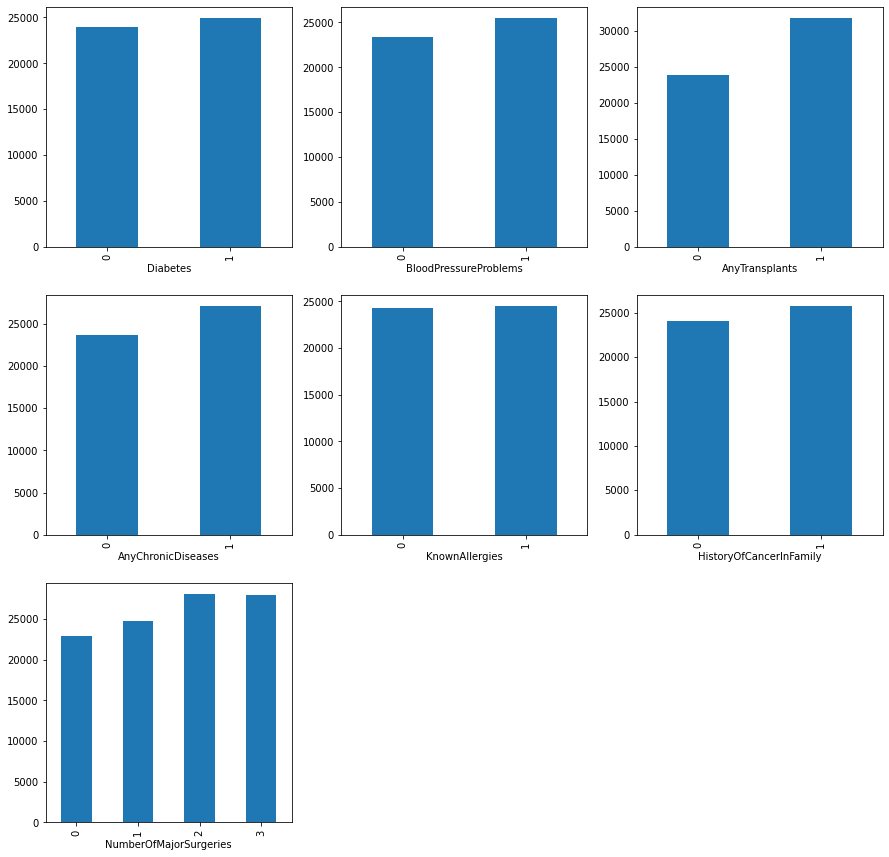

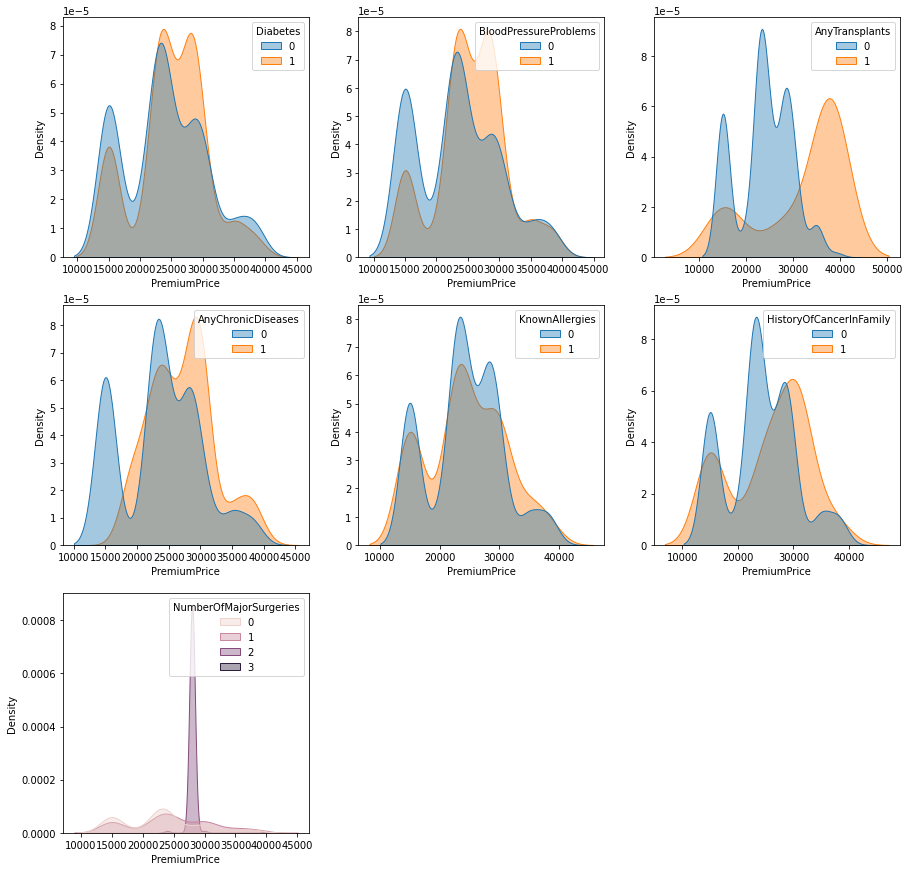

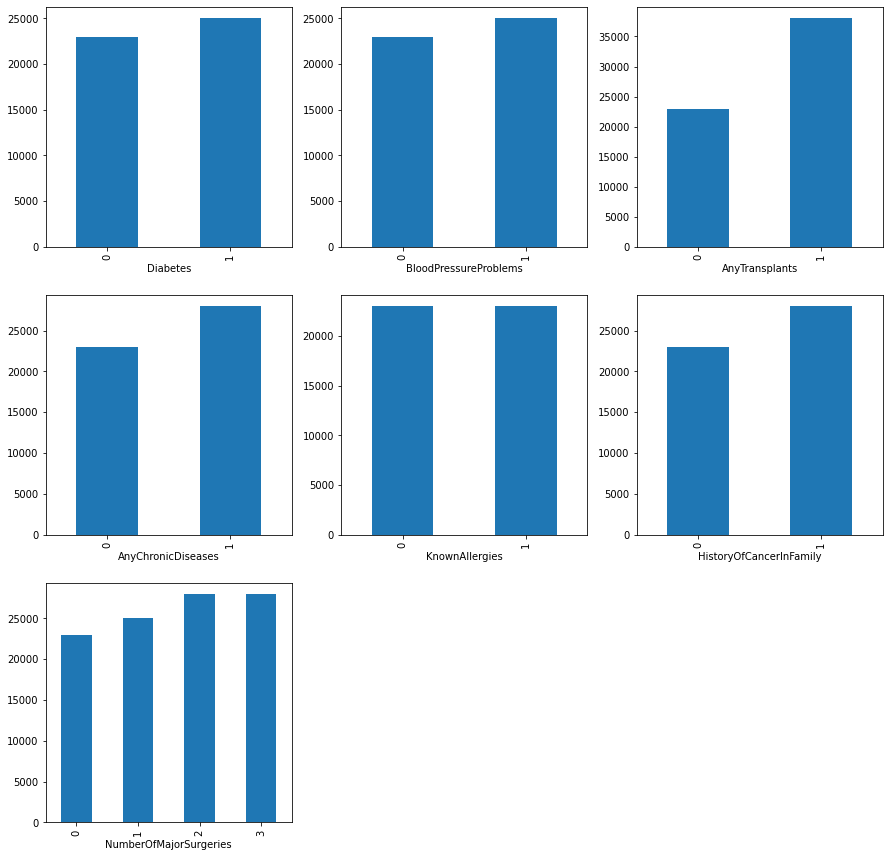

In [10]:
Categorical_Variables = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1
    
plt.show()
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    sns.kdeplot(x='PremiumPrice', data=df, hue=feature, fill=True, common_norm=False, 
                alpha =0.4, warn_singular=False)
    c=c+1
    
plt.show()
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].median().plot.bar()
    c=c+1
    
plt.show()

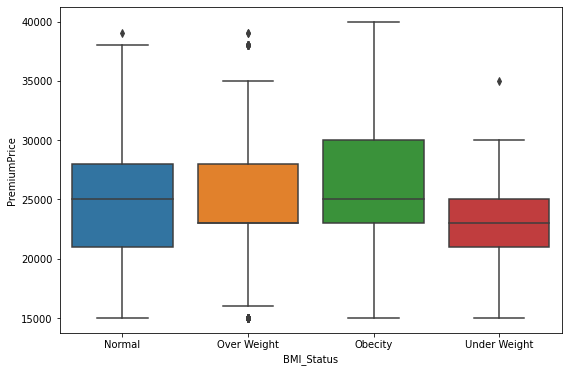

In [11]:
df['BMI'] = df.Weight.values/(((df.Height).values/100)**2)
df.head()
under_index = df[df.BMI<18.4999].index
normal_index = df[(df.BMI>18.5) & (df.BMI<24.9999)].index
over_index = df[(df.BMI>25) & (df.BMI<29.9999)].index
obecity_index = df[df.BMI>30].index

df.loc[under_index,'BMI_Status'] = 'Under Weight'
df.loc[normal_index,'BMI_Status'] = 'Normal'
df.loc[over_index,'BMI_Status'] = 'Over Weight'
df.loc[obecity_index,'BMI_Status'] = 'Obecity'
plt.figure(figsize=(9,6))
ax = sns.boxplot(x='BMI_Status', y='PremiumPrice', data=df)

In [12]:
df_BMI_Status = pd.get_dummies(df.BMI_Status)
df = pd.concat([df,df_BMI_Status], axis=1)
df = df.drop(['BMI_Status','BMI'],axis=1)

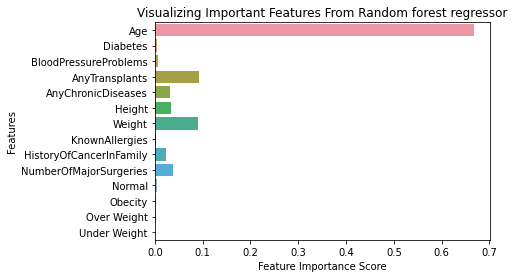

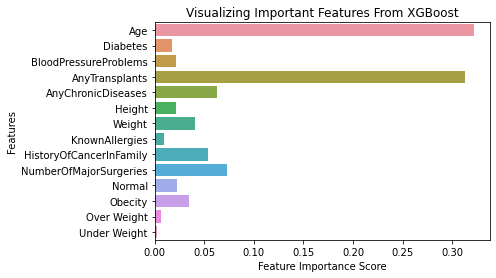

In [13]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('PremiumPrice', axis =1)
y = df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random forest regressor")
plt.show();
import xgboost
from xgboost import XGBRFRegressor

X = df.drop('PremiumPrice', axis =1)
y = df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost")
plt.show();

In [14]:
from sklearn.linear_model import LinearRegression

X = df.drop('PremiumPrice', axis =1)
y = df['PremiumPrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.6723506429733637


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators= 15)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6343131471832328

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6704854760250651

In [17]:
from sklearn.linear_model import Lasso ,LassoCV

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


regressor = Lasso()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6722720711656769

In [18]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.770928062251241


In [19]:
import xgboost
from xgboost import XGBRFRegressor


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

regressor = XGBRFRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7287723252236653


In [20]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split,RandomizedSearchCV
rf = RandomForestRegressor()

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [21]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

df.head()
import category_encoders as ce
import pandas as pd

encoder_PremiumLabel= ce.OrdinalEncoder(cols=['PremiumLabel'],return_df=True,
                           mapping=[{'col':'PremiumLabel',
'mapping':{'Low':0,'Basic':1,'Average':2,'High':3,'SuperHigh':4}}])

df = encoder_PremiumLabel.fit_transform(df)
df.head()
df = df.drop('PremiumPrice', axis = 1)

X = df.drop('PremiumLabel', axis =1)
y = df['PremiumLabel']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[40  0  1  0  0]
 [ 2 77  0  0  0]
 [ 0  2 52  0  0]
 [ 0  3  4  6  0]
 [ 4  0  1  0  6]]
0.9141414141414141
[[40  0  1  0  0]
 [ 2 77  0  0  0]
 [ 0  1 52  1  0]
 [ 0  1  1 11  0]
 [ 4  0  1  0  6]]
0.9393939393939394
